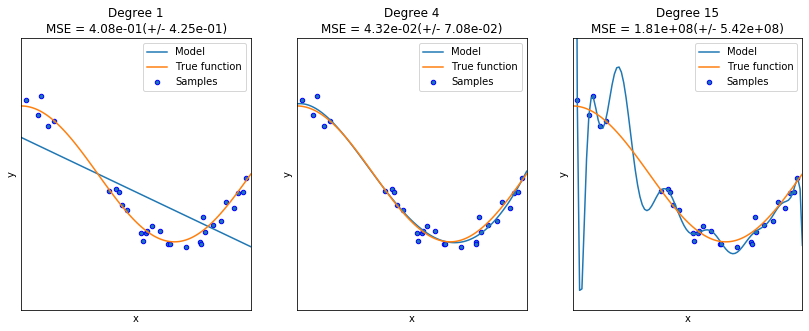

In [0]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())



    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    X_test = np.linspace(0, 1, 100)
    Y_test = pipeline.predict(X_test[:, np.newaxis])



    plt.plot(X_test, Y_test, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")





    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

colours = ['#247BA0', '#F25F5C', '#70C1B3']

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=['Underfit', 'Good Generalisation', 'Overfit'],
                    # horizontal_spacing = 0.1)
)

for i in range(len(degrees)):

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    Y_test = pipeline.predict(X_test[:, np.newaxis])

    fig.add_trace(go.Scatter(x=X, y=y, 
                    legendgroup='uno',
                    mode='markers', 
                    name='Samples',
                    line=dict(color=colours[0])),
                    row=1, col=i+1
    )

    fig.add_trace(go.Scatter(x=X_test, y=Y_test,
                    legendgroup='uno', 
                    mode='lines',
                    name='Model',
                    line=dict(color=colours[1])),
                    row=1, col=i+1
    )
    
    fig.add_trace(go.Scatter(x=X_test, y=true_fun(X_test),
                    legendgroup='uno',
                    mode='lines',
                    name='True function',
                    line=dict(color=colours[2])),
                    row=1, col=i+1
    )

fig.update_yaxes(range=[-2, 2], nticks=10, automargin=True, gridcolor='Gainsboro', 
                 showticklabels=False, zeroline=False)
fig.update_xaxes(range=[0, 1], nticks=10, automargin=True, showgrid=False, 
                 showticklabels=False, zeroline=False)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=True,
    legend_orientation='h'
)

fig.show(renderer='colab')

In [0]:
##########################################
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


colours = ['#F25F5C', 'Crimson', 'SteelBlue']

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU'])

for i in range(4):
    x1 = np.linspace(-8, 8, 50) 
    y1 = 1/(1 + np.exp(-x1)) 

    x2 = np.linspace(-np.pi, np.pi, 50) 
    y2 = np.tanh(x2)

    def relu(x3):
        return max(0.0, x3)
    
    def lrelu(x4):
        if x4 < 0:
            return 0.1*x4
        else:
            return x4

    x3 = [k for k in range(-10, 10)]
    y3 = [relu(k) for k in x3]

    x4 = [l for l in range(-10, 10)]
    y4 = [lrelu(l) for l in x4]

    fig.add_trace(go.Scatter(x=x1, y=y1,
                    legendgroup='uno', 
                    mode='lines',
                    line=dict(color=colours[0])),
                    row=1, col=1
    )

    fig.add_trace(go.Scatter(x=x2, y=y2,
                    legendgroup='uno', 
                    mode='lines',
                    line=dict(color=colours[0])),
                    row=1, col=2
    )

    fig.add_trace(go.Scatter(x=x3, y=y3,
                    legendgroup='uno', 
                    mode='lines',
                    line=dict(color=colours[0])),
                    row=2, col=1
    )

    fig.add_trace(go.Scatter(x=x4, y=y4,
                    legendgroup='uno', 
                    mode='lines',
                    line=dict(color=colours[0])),
                    row=2, col=2
    )

fig.update_yaxes(nticks=5, automargin=True, gridcolor='Gainsboro', 
                 showticklabels=True, zeroline=True, zerolinecolor='Gray')
fig.update_xaxes(nticks=7, automargin=True, showgrid=True, 
                 showticklabels=True, zeroline=True, zerolinecolor='Gray')

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False,
    width=800,
    height=800
)

fig.show(renderer='colab')